In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
uploaded_file_path = "C://Users//ronak//Downloads//spam.csv"
df = pd.read_csv(uploaded_file_path, encoding='latin1', usecols=[0, 1])

In [3]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.columns = ['label', 'text']


In [5]:
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})


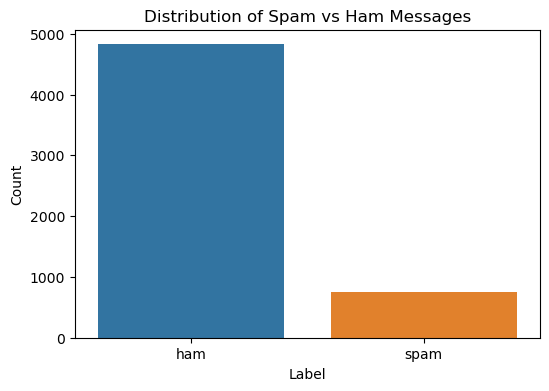

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label')
plt.title('Distribution of Spam vs Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [7]:
#Logistic Regression Model

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label_num'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [9]:
logreg = LogisticRegression()

logreg.fit(X_train_tfidf, y_train)
y_pred = logreg.predict(X_test_tfidf)


In [10]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}\n')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.95

Confusion Matrix:
[[962   3]
 [ 50 100]]
